In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [2]:
df = pd.read_csv(r"C:\Users\dece2\OneDrive\Desktop\Data_Analysis_projects\SuperStore\train.csv")
#filling Missed Value
df['Postal Code'].fillna(0, inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
if (df.duplicated().sum() > 0):
    print('dublicate exists')
else:
    print('dublicate not exists')

C:\Users\dece2\AppData\Local\Temp\ipykernel_12180\3623904272.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


dublicate not exists


. Descriptive Analysis
Sales Summary: Basic statistics (mean, median, max, min) to understand sales distribution.
Sales by Category and Sub-Category: Analyze which categories and sub-categories contribute most to total sales.
Segment Analysis: Compare sales across the different segments (Consumer, Corporate, Home Office) to understand key customer segments.
Ship Mode Analysis: Review shipping mode distribution to determine the most popular options and their impact on delivery time.. 

Sales Summary: Basic statistics (mean, median, max, min) to understand sales distribution.


In [ ]:
sales_summary = df['Sales'].describe()
sales_summary[['mean', '50%', 'max', 'min']].reset_index()

,index,Sales
0,mean,230.769059
1,50%,54.490000
2,max,22638.480000
3,min,0.444000


Sales by Category and Sub-Category: Analyze which categories and sub-categories contribute most to total sales.


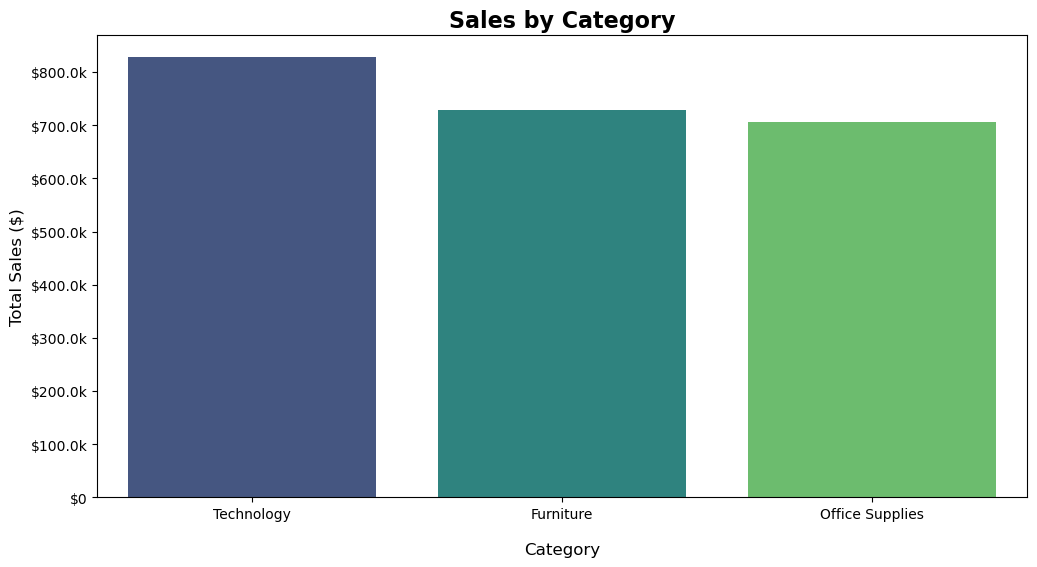

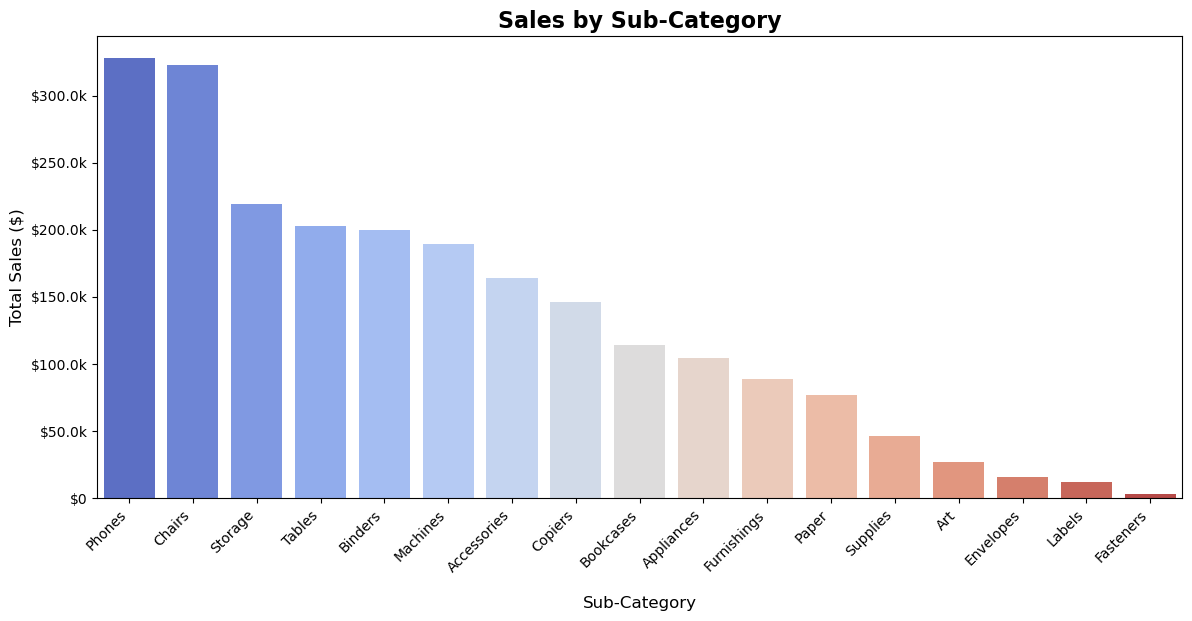

In [47]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Sales by Category and Sub-Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# Format function for dollar values with 'k'
def format_currency(value):
    if value >= 1000:
        return f"${value/1000:.1f}k".rstrip('0').rstrip('.')
    return f"${int(value)}"

# Add formatted column for display
category_sales['Formatted_Sales'] = category_sales['Sales'].apply(format_currency)
subcategory_sales['Formatted_Sales'] = subcategory_sales['Sales'].apply(format_currency)

# Visualize - Sales by Category
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_sales, 
    x='Category', 
    y='Sales',  # Use numeric column for plotting
    palette='viridis',
    color='steelblue',
    hue='Category'
)
plt.title('Sales by Category', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xlabel('Category', fontsize=12, labelpad=15)  # Add space between label and x-axis

# Format y-axis labels
def currency_formatter(x, _):
    if x >= 1000:
        return f"${x/1000:.1f}k".rstrip('0').rstrip('.')
    return f"${int(x)}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

# Visualize - Sales by Sub-Category
plt.figure(figsize=(14, 6))
sns.barplot(
    data=subcategory_sales, 
    x='Sub-Category', 
    y='Sales',  # Use numeric column for plotting
    palette='coolwarm',
     color='coral',
     hue='Sub-Category'
)
plt.title('Sales by Sub-Category', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xlabel('Sub-Category', fontsize=12, labelpad=15)  # Add space between label and x-axis
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()


Segment Analysis: Compare sales across the different segments (Consumer, Corporate, Home Office) to understand key customer segments.


In [ ]:
sales_across_segment = df.groupby('Segment')['Sales'].agg('sum').sort_values(ascending=False).reset_index()


,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


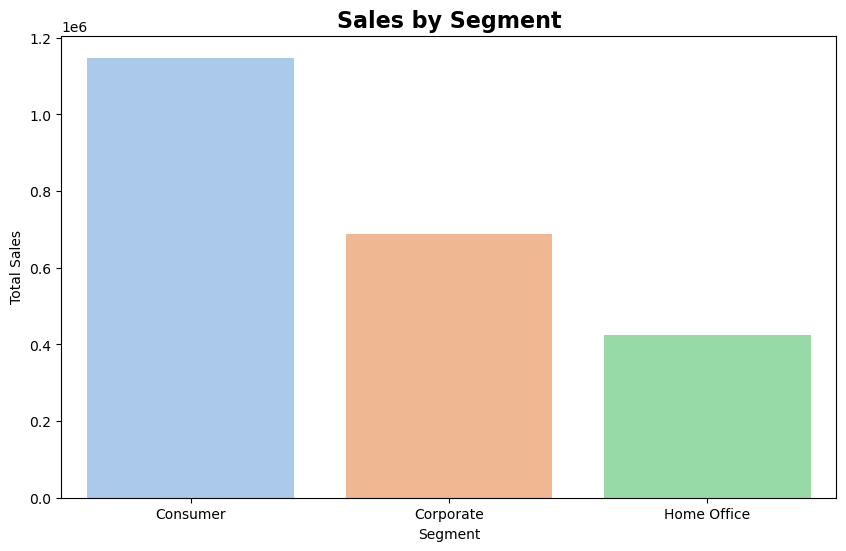

In [50]:
# Sales by Segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).reset_index()

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='pastel', hue='Segment')
plt.title('Sales by Segment', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.show()


Ship Mode Analysis: Review shipping mode distribution to determine the most popular options and their impact on delivery time.. 

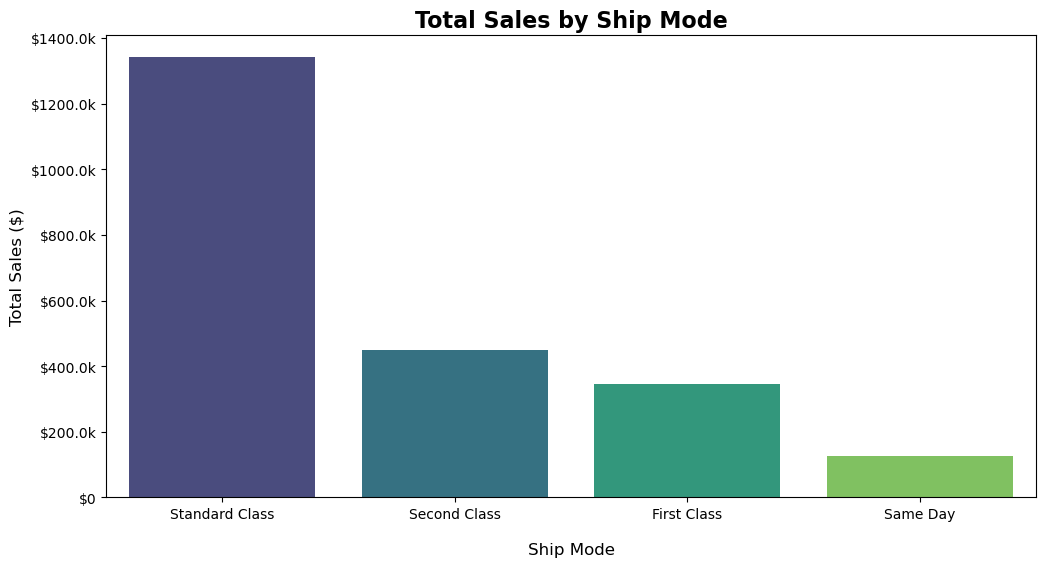

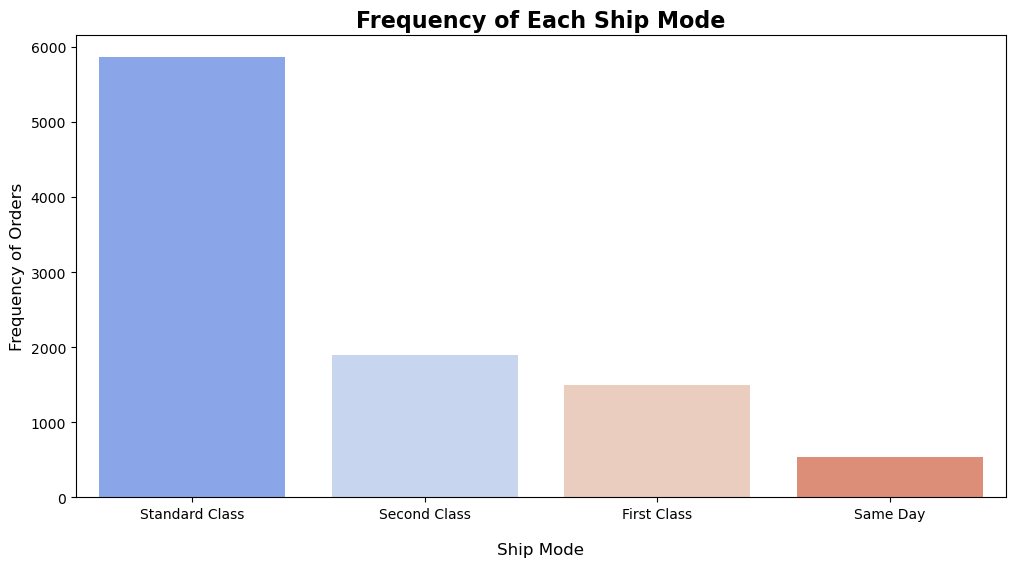

In [57]:


# Ship Mode Analysis: Total Sales by Ship Mode
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).reset_index()

# Ship Mode Analysis: Frequency of Each Ship Mode
ship_mode_frequency = df['Ship Mode'].value_counts().sort_values(ascending=False).reset_index()
ship_mode_frequency.columns = ['Ship Mode', 'Frequency']

# Visualize - Total Sales by Ship Mode
plt.figure(figsize=(12, 6))
sns.barplot(data=ship_mode_sales, x='Ship Mode', y='Sales', palette='viridis', hue='Ship Mode')
plt.title('Total Sales by Ship Mode', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xlabel('Ship Mode', fontsize=12, labelpad=15)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

# Visualize - Frequency of Each Ship Mode
plt.figure(figsize=(12, 6))
sns.barplot(data=ship_mode_frequency, x='Ship Mode', y='Frequency', palette='coolwarm', hue='Ship Mode')
plt.title('Frequency of Each Ship Mode', fontsize=16, fontweight='bold')
plt.ylabel('Frequency of Orders', fontsize=12)
plt.xlabel('Ship Mode', fontsize=12, labelpad=15)
plt.show()


C:\Users\dece2\AppData\Local\Temp\ipykernel_12180\1389915009.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ship_mode_combined['Ship Mode'], rotation=45, ha='right', fontsize=12)


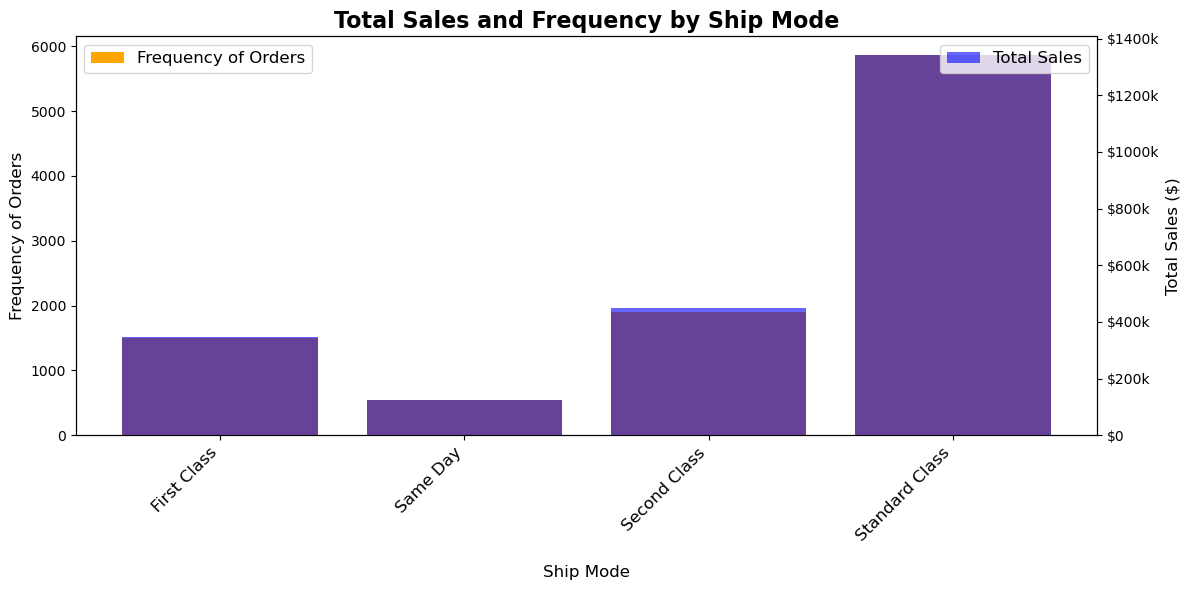

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Define a currency formatter function
def currency_formatter(x, _):
    if x >= 1000:
        formatted = f"${x/1000:.1f}".rstrip("0").rstrip(".") + "k"
    else:
        formatted = f"${int(x)}"
    return formatted

# Ship Mode Analysis: Total Sales by Ship Mode
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Ship Mode Analysis: Frequency of Each Ship Mode
ship_mode_frequency = df['Ship Mode'].value_counts().reset_index()
ship_mode_frequency.columns = ['Ship Mode', 'Frequency']

# Merging sales and frequency data into one DataFrame for easier plotting
ship_mode_combined = pd.merge(ship_mode_sales, ship_mode_frequency, on='Ship Mode')


# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bar for Frequency on the left y-axis
ax1.bar(
    ship_mode_combined['Ship Mode'],
    ship_mode_combined['Frequency'],
    color='orange',
    label='Frequency of Orders'
)

# Customize the left y-axis
ax1.set_ylabel('Frequency of Orders', fontsize=12)
ax1.set_xlabel('Ship Mode', fontsize=12, labelpad=15)
ax1.set_xticklabels(ship_mode_combined['Ship Mode'], rotation=45, ha='right', fontsize=12)

# Create a second y-axis for Total Sales
ax2 = ax1.twinx()

# Create bar for Total Sales on the right y-axis
ax2.bar(
    ship_mode_combined['Ship Mode'],
    ship_mode_combined['Sales'],
    color='blue',
    alpha=0.6,
    label='Total Sales'
)

# Customize the right y-axis
ax2.set_ylabel('Total Sales ($)', fontsize=12)
ax2.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Title and layout adjustments
ax1.set_title('Total Sales and Frequency by Ship Mode', fontsize=16, fontweight='bold')

# Add legends for both axes
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Make the layout tight for better spacing
plt.tight_layout()

# Show the plot
plt.show()
